In [19]:
#Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [20]:
#Load and read data frame:
df = pd.read_csv('D:/1. UNIK/1. PREDMETY/Diplom/my_code/DBSCAN_presentation/Iris.csv', delimiter=',')
df = df.drop('Id', axis=1)
df = df.drop('Species', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
from sklearn.preprocessing import StandardScaler

#Define X as numpy array:
X = np.array(df)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
db = DBSCAN().fit(X)
labels = db.labels_

# Number of clusters in labels, игнорирование шума, если он присутствует.
# кол-во кластеров = len(set(labels)), если есть кластер -1, тогда кол-во кластеров = len(set(labels)) -1
# кластер шума не считают кластером
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# подсчет значений (-1) в списке всех меток кластера объектов
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 35


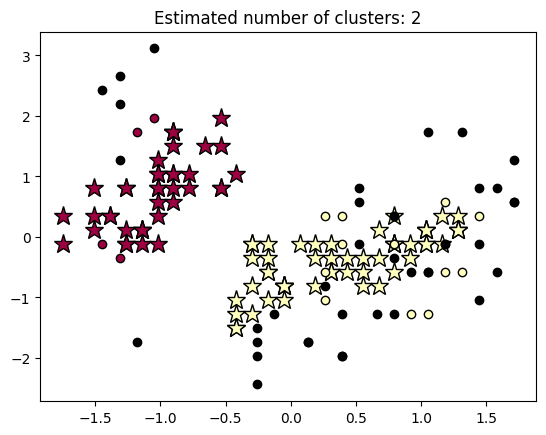

In [23]:
#Уникальные значеня лабелс
unique_labels = set(labels)
# Метка ценетрального объекта
core_samples_mask = np.zeros_like(labels, dtype=bool)
# объект core_samples_mask по индексу [db.core_sample_indices_] - (индексы центровых точек) = True
core_samples_mask[db.core_sample_indices_] = True
# Возвращает список кортежей из 4х значений [0:1] 4 цвета
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# k - значенеи из unique_labels, col - цвет zip-делает кортеж из уникальных меток кластеров и цветов 
# т.е 1 цвет для все хточек одного кластера
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Выбирает точки которые (class_member_mask)-принадлеж одному кластеру 
    # и (core_samples_mask)-являются корневыми
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], # Какой-то столбец в массиве данных 
        xy[:, 1], # :, 1 - значит все троки и 1й столбец в массиве 
        "*", # значек отрисоки точек 
        markerfacecolor=tuple(col), # Цвет точек 
        markeredgecolor="k", # цвет контуров точек  
        markersize=14, # размер значков/точек
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, -1],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 110


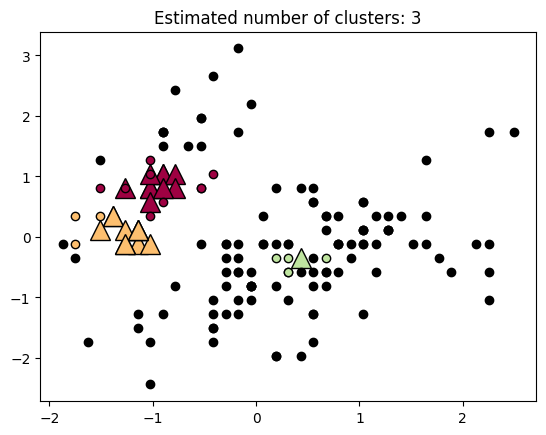

In [24]:
# Значения eps и min_samples присвоены вручную
db = DBSCAN(eps=0.4, min_samples=7,).fit(X)
labels = db.labels_

# Number of clusters in labels, игнорирование шума, если он присутствует.
# кол-во кластеров = len(set(labels)), если есть кластер -1, тогда кол-во кластеров = len(set(labels)) -1
# кластер шума не считают кластером
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# подсчет значений (-1) в списке всех меток кластера объектов
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
# создает массив нулей такой же формы и типа данных, что и массив labels. 
# Аргумент dtype=bool указывает, что тип данных элементов массива - 
# логические значения (True или False).
core_samples_mask = np.zeros_like(labels, dtype=bool)
# True присваивается корневым элементам
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "^",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Estimated number of clusters: 5
Estimated number of noise points: 7


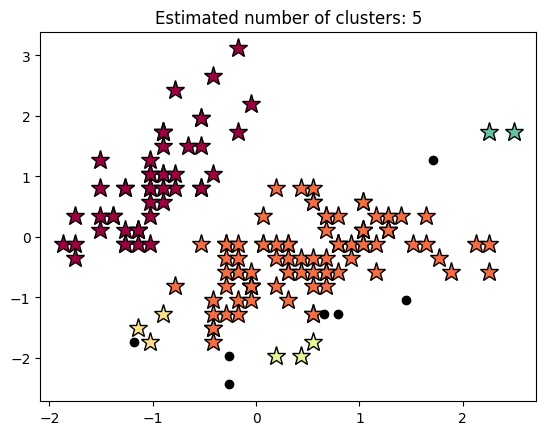

In [54]:
db = DBSCAN(eps=0.6, min_samples=2).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "*",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, -1],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()